<a href="https://www.kaggle.com/code/siddharthjeph/zomato-stock-price?scriptVersionId=167195015" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/kaggle/input/zomato-stock-price/zomato.csv')

In [3]:
dataset.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
...,...,...,...,...,...,...,...
95,2021-12-10,144.100006,146.399994,139.750000,140.550003,140.550003,27881031
96,2021-12-13,142.199997,144.449997,141.899994,142.649994,142.649994,20318225
97,2021-12-14,144.699997,144.949997,140.000000,140.649994,140.649994,19474412
98,2021-12-15,140.500000,142.000000,140.000000,140.600006,140.600006,12791660


In [4]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [5]:
dataset.drop(columns=['Adj Close'], inplace=True)


In [6]:
dataset.shape

(631, 6)

In [7]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,117973089


In [9]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    631 non-null    datetime64[ns]
 1   Open    631 non-null    float64       
 2   High    631 non-null    float64       
 3   Low     631 non-null    float64       
 4   Close   631 non-null    float64       
 5   Volume  631 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 29.7 KB


In [12]:
dataset.describe()

,Date,Open,High,Low,Close,Volume
count,631,631.000000,631.000000,631.000000,631.000000,6.310000e+02
mean,2022-10-29 18:54:11.980982528,90.011252,91.835737,87.868304,89.707686,6.731737e+07
min,2021-07-23 00:00:00,40.849998,44.400002,40.599998,41.650002,0.000000e+00
25%,2022-03-10 12:00:00,62.549999,63.450001,61.125000,62.074998,2.800788e+07
50%,2022-10-31 00:00:00,80.000000,81.000000,78.099998,79.699997,4.759710e+07
75%,2023-06-19 12:00:00,124.474998,126.750000,121.525002,124.599998,7.525439e+07
max,2024-02-07 00:00:00,161.149994,169.000000,154.250000,160.300003,6.948953e+08
std,NaN,32.757639,33.319545,31.900849,32.621900,7.461030e+07


In [13]:
print(len(dataset))

631


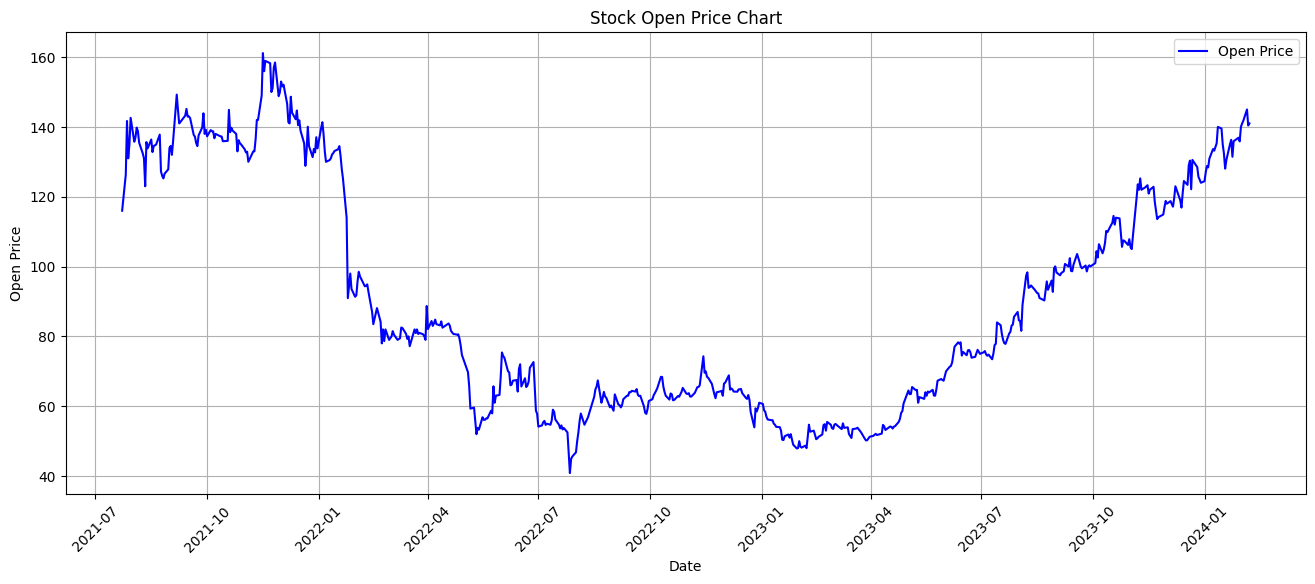

In [14]:
plt.figure(figsize=(16, 6))
plt.plot(dataset['Date'], dataset['Open'], label='Open Price', color='blue')

plt.title('Stock Open Price Chart')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()


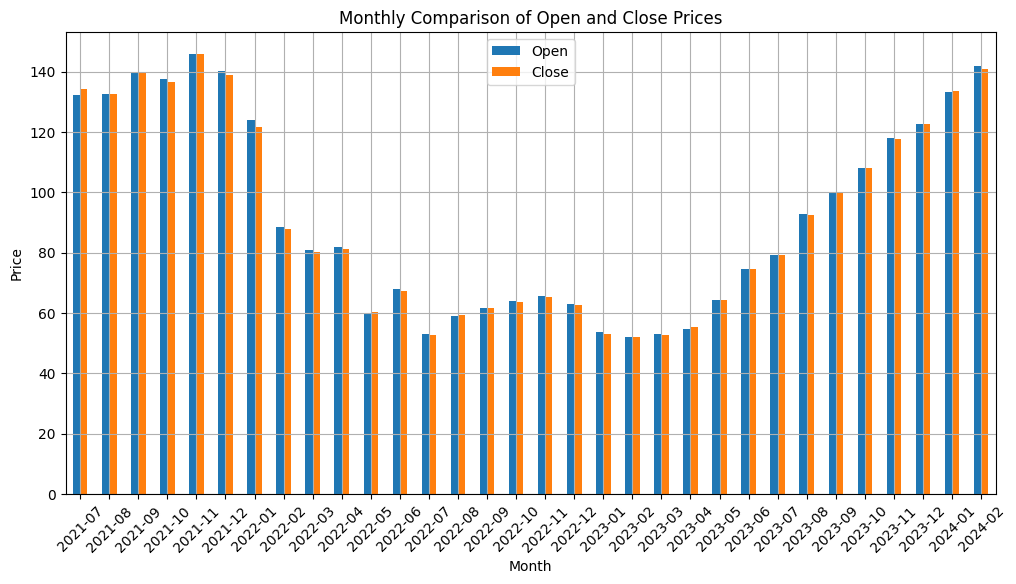

In [15]:
# Assuming 'Date' column is already in datetime format
# If not, convert it to datetime format: dataset['Date'] = pd.to_datetime(dataset['Date'])

# Extracting month and year from the 'Date' column
dataset['YearMonth'] = dataset['Date'].dt.to_period('M')

# Grouping by month and calculating mean open and close prices
monthly_prices = dataset.groupby('YearMonth').agg({'Open': 'mean', 'Close': 'mean'})

# Plotting the open and close prices as a bar graph
monthly_prices.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Comparison of Open and Close Prices')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()


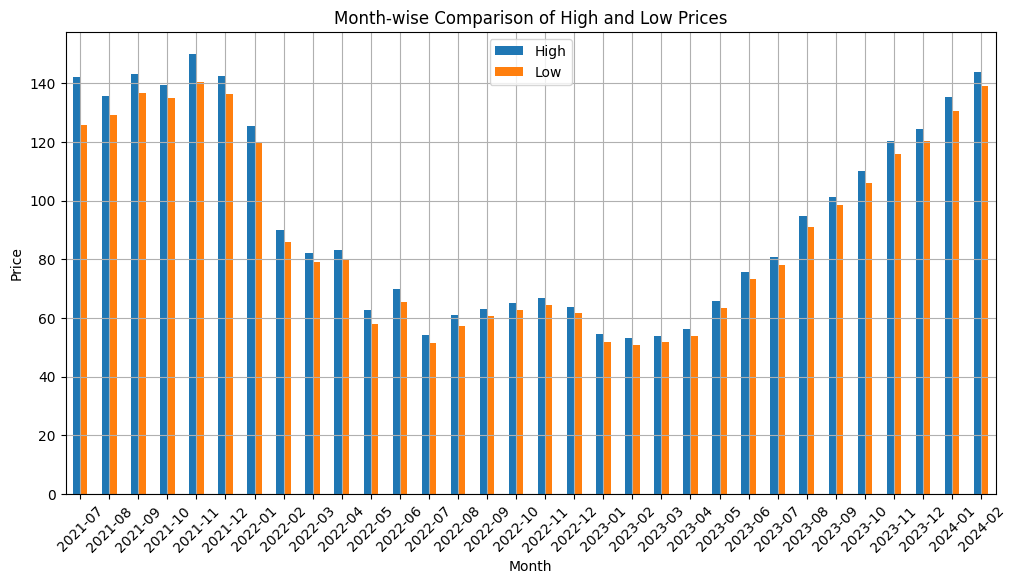

In [16]:
# Assuming 'Date' column is already in datetime format
# If not, convert it to datetime format: dataset['Date'] = pd.to_datetime(dataset['Date'])

# Extracting month and year from the 'Date' column
dataset['YearMonth'] = dataset['Date'].dt.to_period('M')

# Grouping by month and calculating mean high and low prices
monthly_high_low = dataset.groupby('YearMonth').agg({'High': 'mean', 'Low': 'mean'})

# Plotting the high and low prices as a bar graph
monthly_high_low.plot(kind='bar', figsize=(12, 6))
plt.title('Month-wise Comparison of High and Low Prices')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()


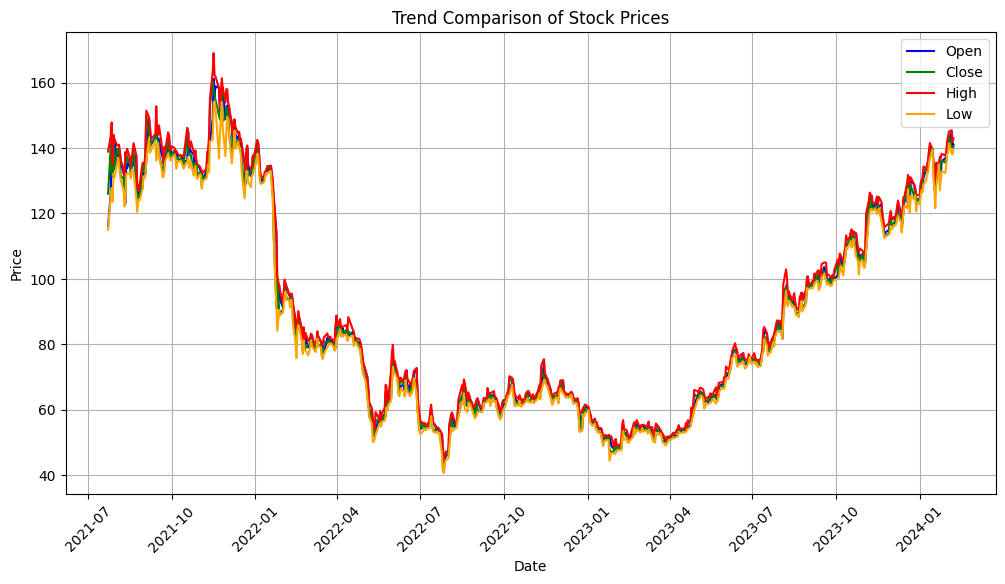

In [17]:
# Plotting the trends of open, close, high, and low prices
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'], dataset['Open'], label='Open', color='blue')
plt.plot(dataset['Date'], dataset['Close'], label='Close', color='green')
plt.plot(dataset['Date'], dataset['High'], label='High', color='red')
plt.plot(dataset['Date'], dataset['Low'], label='Low', color='orange')

plt.title('Trend Comparison of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()


In [18]:
x = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 0)

In [20]:
x_train.shape

(473, 4)

In [21]:
x_test.shape

(158, 4)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix , accuracy_score
regressor = LinearRegression()

In [23]:
regressor.fit(x_train,y_train)

LinearRegression()

In [24]:
print(regressor.coef_)

[-5.01851352e-01  7.45342928e-01  7.58445394e-01 -5.27121935e-10]


In [25]:
print(regressor.intercept_)

-0.22073614645785256


In [26]:
predicted=regressor.predict(x_test)

In [27]:
print(x_test)

           Open        High         Low    Volume
391   50.799999   51.799999   50.450001  48841966
439   63.450001   64.949997   63.150002  65082316
311   62.900002   62.950001   62.049999   7775480
249   53.750000   54.000000   52.900002  27302087
481   75.449997   77.250000   74.550003  49243205
..          ...         ...         ...       ...
132   95.750000   99.750000   94.800003  18674088
581  114.900002  116.900002  113.500000  61963724
541   99.900002  101.199997   98.500000  34894254
97   144.699997  144.949997  140.000000  19474412
611  134.250000  136.149994  132.250000  29917881

[158 rows x 4 columns]


In [28]:
predicted.shape

(158,)

In [29]:
dframe=pd.DataFrame(y_test,predicted)

In [30]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted Price':predicted})

In [31]:
print(dfr)

         Actual  Predicted Price
391   51.400002        51.131804
439   63.549999        64.208338
311   62.349998        62.189588
249   53.650002        53.160643
481   75.650002        76.008471
..          ...              ...
132   98.900002        97.965736
581  113.800003       115.298022
541  100.099998        99.761493
97   140.649994       141.370920
611  134.649994       134.172788

[158 rows x 2 columns]


In [32]:
dfr.head(25)

,Actual,Predicted Price
391,51.400002,51.131804
439,63.549999,64.208338
311,62.349998,62.189588
249,53.650002,53.160643
481,75.650002,76.008471
548,103.900002,102.709055
261,55.950001,54.953840
243,55.650002,56.365727
466,77.599998,76.735711
144,85.900002,86.066096


In [33]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [34]:
regressor.score(x_test,y_test)

0.9985348308776741

In [35]:
import math

In [36]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.7493677612272689


In [37]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 1.5521375379282507


In [38]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 1.2458481199280476


<Axes: ylabel='Density'>

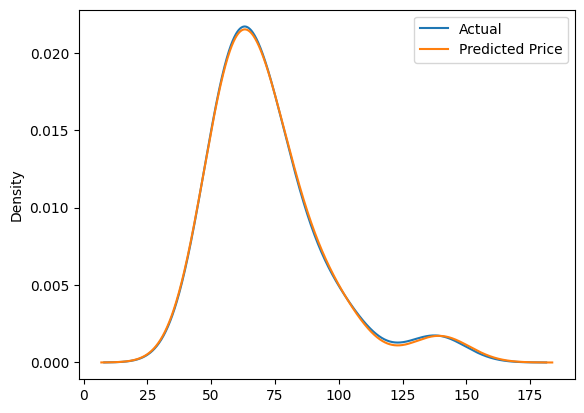

In [39]:
graph=dfr.head(20)
graph.plot(kind='kde')